## Principal Component Analysis

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.


Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analysing data much easier and faster for machine learning algorithms without extraneous variables to process.


So, to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

## Dimensionality Reduction
There are many ways to achieve dimensionality reduction, but most of these techniques fall into one of two classes:
- Feature Elimination
- Feature Extraction

Feature elimination is what it sounds like: we reduce the feature space by eliminating features. Advantages of feature elimination methods include simplicity and maintaining interpretability of your variables.

As a disadvantage, though, you gain no information from those variables you have dropped. 

Feature extraction, however, does not run into this problem. Say we have ten independent variables. In feature extraction, we create ten “new” independent variables, where each “new” independent variable is a combination of each of the ten “old” independent variables. However, we create these new independent variables in a specific way and order these new variables by how well they predict our dependent variable.

You might say, “Where does the dimensionality reduction come into play?” Well, we keep as many of the new independent variables as we want, but we drop the “least important ones.” 

Because we ordered the new variables by how well they predict our dependent variable, we know which variable is the most important and least important. Because these new independent variables are combinations of our old ones, we are still keeping the most valuable parts of our old variables, even when we drop one or more of these “new” variables!

Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables! 

As an added benefit, each of the “new” variables after PCA are all independent of one another. This is a benefit because the assumptions of a linear model require our independent variables to be independent of one another. If we decide to fit a linear regression model with these “new” variables, this assumption will necessarily be satisfied.

1. Standardize the data
2. Covariance matrix computation
3. Calculate eigen values and eigen vectors from the covariance matrix
4. Select the feature vector  that has eigen vectors we decide to keep
4. Feature vector.T * Standardized data.T

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = np.matrix(([1,2,4],[4,1,2],[5,4,8]))
df = pd.DataFrame(df)

In [4]:
df

0  1  2
0  1  2  4
1  4  1  2
2  5  4  8

### STEP 1: STANDARDIZATION
The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

More specifically, the reason why it is critical to perform standardization prior to PCA, is that the latter is quite sensitive regarding the variances of the initial variables. 

That is, if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (For example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.

Mathematically, this can be done by subtracting the mean and dividing by the standard deviation for each value of each variable.
 
Once the standardization is done, all the variables will be transformed to the same scale.

In [8]:
#Standardize
sc = StandardScaler()
df1 = sc.fit_transform(df)
df1 = pd.DataFrame(df1)
df1

0         1         2
0 -1.372813 -0.267261 -0.267261
1  0.392232 -1.069045 -1.069045
2  0.980581  1.336306  1.336306

### STEP 2: COVARIANCE MATRIX COMPUTATION
The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. 

Sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix.

The covariance matrix is a p × p symmetric matrix (where p is the number of dimensions) that has as entries the covariances associated with all possible pairs of the initial variables. For example, for a 3-dimensional data set with 3 variables x, y, and z, the covariance matrix is a 3×3 matrix of this from:

 
Covariance Matrix for 3-Dimensional Data
Since the covariance of a variable with itself is its variance (Cov(a,a)=Var(a)), in the main diagonal (Top left to bottom right) we actually have the variances of each initial variable. 

And since the covariance is commutative (Cov(a,b)=Cov(b,a)), the entries of the covariance matrix are symmetric with respect to the main diagonal, which means that the upper and the lower triangular portions are equal.

**What do the covariances that we have as entries of the matrix tell us about the correlations between the variables?**

It is actually the sign of the covariance that matters:

- if positive then: the two variables increase or decrease together (correlated)
- if negative then: One increases when the other decreases (Inversely correlated)

The covariance matrix is nothing more than a table that summaries the correlations between all the possible pairs of variables.

In [10]:
#Covariance matrix
dfcov = df1.cov()
dfcov

0         1         2
0  1.500000  0.628971  0.628971
1  0.628971  1.500000  1.500000
2  0.628971  1.500000  1.500000

In [15]:
# Eigen values and eigen vectors
eigenvalues,eigenvectors = np.linalg.eig(dfcov)
print(f'Eigen values : {eigenvalues}')
print(f'Eigen vectors : {eigenvectors}')

Eigen values : [ 3.41348992e+00  1.08651008e+00 -1.40107377e-32]
Eigen vectors : [[-4.21537439e-01 -9.06810999e-01 -4.92222871e-18]
 [-6.41212207e-01  2.98071982e-01 -7.07106781e-01]
 [-6.41212207e-01  2.98071982e-01  7.07106781e-01]]


### STEP 3: COMPUTE THE EIGENVECTORS AND EIGENVALUES OF THE COVARIANCE MATRIX TO IDENTIFY THE PRINCIPAL COMPONENTS

Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components of the data. 

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. 
These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. 

So, the idea is 2-dimensional data gives you 67 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on, until having something like shown in the scree plot below. 

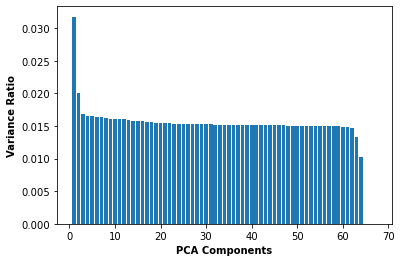

Organizing information in principal components this way, will allow you to reduce dimensionality without losing much information, and this by discarding the components with low information and considering the remaining components as your new variables.

An important thing to realize here is that the principal components are less interpretable and do not have any real meaning since they are constructed as linear combinations of the initial variables.

Geometrically speaking, principal components represent the directions of the data that explain a **maximal amount of variance**, that is to say, the lines that capture most information of the data. 

The relationship between variance and information here, is that the larger the variance carried by a line, the larger the dispersion of the data points along it, and the larger the dispersion along a line, the more the information it has. 

To put all this simply, just think of principal components as new axes that provide the best angle to see and evaluate the data, so that the differences between the observations are better visible.


### HOW PCA CONSTRUCTS THE PRINCIPAL COMPONENTS
As there are as many principal components as there are variables in the data, principal components are constructed in such a manner that the first principal component accounts for the largest possible variance in the data set. 

For example, let us assume that the scatter plot of our data set is as shown below.

The first principal component is approximately the line that matches the purple marks because it goes through the origin, and it is the line in which the projection of the points (red dots) is the most spread out. 

Or mathematically speaking, it is the line that maximizes the variance (the average of the squared distances from the projected points (red dots) to the origin).



![SegmentLocal](https://i.gifer.com/H7zW.gif)

The second principal component is calculated in the same way, with the condition that it is uncorrelated with (i.e., perpendicular to) the first principal component and that it accounts for the next highest variance.

This continues until a total of p principal components have been calculated, equal to the original number of variables.
Now back to eigenvectors and eigenvalues. 

Eigenvectors and eigenvalues always come in pairs, so that every eigenvector has an eigenvalue. And their number is equal to the number of dimensions of the data. For example, for a 3-dimensional data set, there are 3 variables, therefore there are 3 eigenvectors with 3 corresponding eigenvalues.

It is eigenvectors and eigenvalues who are behind all the magic explained above, because 
- the eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance (most information) and that we call Principal Components. 

- And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.

By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.


In [14]:
# Feature vector * Standardized data
pca_manual = np.matmul(np.array(df1),eigenvectors)
pca_manual

array([[ 9.21434395e-01,  1.08555570e+00, -2.77555756e-17],
       [ 1.20562878e+00, -9.92985241e-01, -1.11022302e-16],
       [-2.12706317e+00, -9.25704621e-02,  1.11022302e-16]])

### STEP 4: FEATURE VECTOR
As we saw in the previous step, computing the eigenvectors and ordering them by their eigenvalues in descending order, allow us to find the principal components in order of significance. 

In this step, we to choose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form with the remaining ones a matrix of vectors that we call Feature vector.

So, the feature vector is simply a matrix that has as columns the eigenvectors of the components that we decide to keep. This makes it the first step towards dimensionality reduction, because if we choose to keep only p eigenvectors (components) out of n, the final data set will have only p dimensions.
- https://builtin.com/data-science/step-step-explanation-principal-component-analysis

In [16]:
from sklearn.decomposition import PCA

In [17]:
df = pd.read_csv("weatherAnalysis.csv")
df.dropna(inplace=True)

In [19]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [23]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [21]:
df1 =df.drop(columns = ['Date', 'Location','WindGustDir','WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow'],axis=1)

In [47]:
df2 = df1.copy()
df2.head(3)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
1      6.7     22.0       0.0          5.4       0.4           44.0   
2      6.2     25.7       0.0          4.2      10.9           20.0   
4     13.4     27.2       0.0          6.0      10.2           30.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
1          13.0          19.0         65.0         37.0       1014.0   
2           7.0           6.0         71.0         28.0       1022.5   
4           7.0          15.0         61.0         46.0       1016.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
1       1008.8       7.0       8.0     14.0     21.8  
2       1019.4       2.0       7.0     12.8     23.6  
4       1011.8       1.0       1.0     21.7     25.6

In [48]:
sc = StandardScaler()
df2 = pd.DataFrame(sc.fit_transform(df2),columns=df2.columns)
df2.head(3)

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0 -1.053867 -0.318894 -0.306381    -0.026968 -1.948832       0.233925   
1 -1.131716  0.212511 -0.306381    -0.353985  0.840855      -1.566672   
2 -0.010691  0.427945 -0.306381     0.136541  0.654876      -0.816424   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0     -0.322909     -0.092363    -0.045601    -0.623155    -0.467662   
1     -1.043029     -1.619074     0.278661    -1.068453     0.761135   
2     -1.043029     -0.562120    -0.261776    -0.177858    -0.062882   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
0    -0.871675  0.988544  1.385613 -0.640796 -0.133052  
1     0.670712 -0.798601  1.008397 -0.823567  0.130555  
2    -0.435151 -1.156030 -1.254904  0.531986  0.423450

In [31]:
pca1 = PCA()

In [50]:
## project the original data into the PCA space
pcafit = pca1.fit_transform(df2)

In [55]:
pca1.components_[0]

array([ 0.29323834,  0.39129384, -0.05233676,  0.32503569,  0.25205023,
        0.09321086,  0.07541099,  0.07623651, -0.28897076, -0.23741992,
       -0.19789226, -0.23181274, -0.16713836, -0.16407996,  0.36131093,
        0.38810153])

In [35]:
pca1.explained_variance_ratio_

array([0.34545814, 0.2145684 , 0.13416047, 0.06332069, 0.05625497,
       0.04691753, 0.0298581 , 0.02568758, 0.02473507, 0.01955873,
       0.01622369, 0.0134821 , 0.00575537, 0.00186347, 0.00151707,
       0.00063861])

In [36]:
np.cumsum(pca1.explained_variance_ratio_)

array([0.34545814, 0.56002654, 0.69418701, 0.7575077 , 0.81376267,
       0.8606802 , 0.8905383 , 0.91622588, 0.94096095, 0.96051969,
       0.97674338, 0.99022548, 0.99598085, 0.99784432, 0.99936139,
       1.        ])

<BarContainer object of 16 artists>

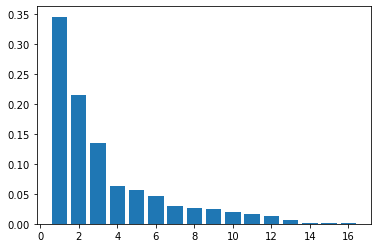

In [38]:
plt.bar(range(1,len(pca1.explained_variance_ratio_)+1),pca1.explained_variance_ratio_)

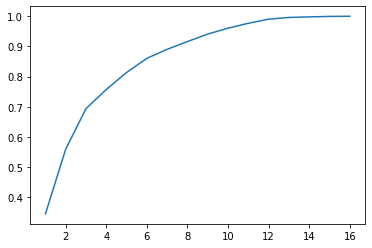

In [39]:
plt.plot(range(1,len(pca1.explained_variance_ratio_)+1),np.cumsum(pca1.explained_variance_ratio_))

In [40]:
pca2 = PCA(n_components=8)

In [41]:
pcafit2 = pca2.fit_transform(df2)

In [42]:
final = pd.DataFrame(pcafit2,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])
final.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0 -1.147337  1.284510  0.047300 -0.065573 -1.881343  1.277596 -0.747006   
1 -0.895744 -2.449030 -1.298452  0.289124 -0.763734  0.962266 -0.078559   
2  1.179051 -1.539654 -0.898966  1.096009 -0.048562 -0.483750  0.161154   
3 -0.291491  0.452400 -0.937506  0.418786 -0.511299 -0.429427 -0.252226   
4  3.567295 -1.692015 -0.405575 -0.123076  0.464116  0.371430  1.281231   

        pc8  
0 -0.333885  
1 -0.749610  
2  0.133365  
3  1.007528  
4  0.245812

<AxesSubplot:>

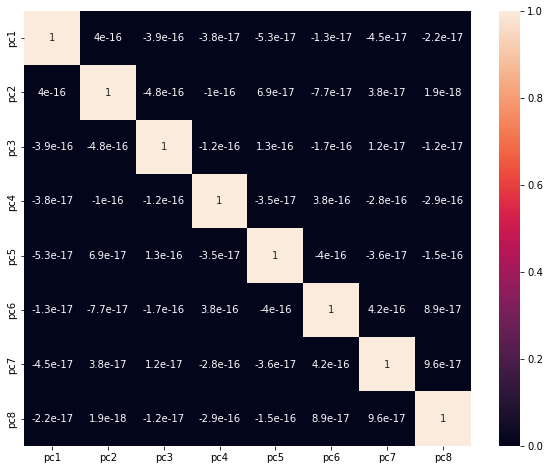

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(final.corr(),annot=True)

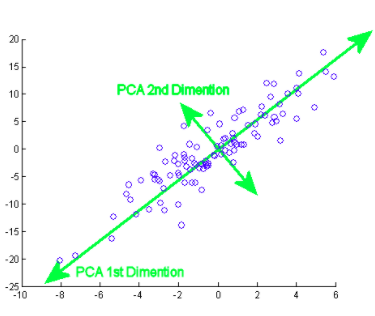